In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

from google.colab import drive

#Mount your Drive
drive.mount('/content/drive')

#once mounted,navigate to the folder
#example path(adjust bsed on your structure)
path='/content/drive/My Drive/Colab Notebooks/Amazon_electronics.csv'

df=pd.read_csv(path)

Mounted at /content/drive


In [ ]:
print(df.head())
print(df.tail())
print(df.shape)
print(df.info())
df['category'].unique()
df.isnull().sum()

df['brand'].fillna("unknown",inplace=True)
df['user_attr'].fillna("unknown",inplace=True)
df.isnull().sum()

df.drop_duplicates(inplace=True)

print(df.dtypes)
df.reset_index(drop=True,inplace=True)


   item_id  user_id  rating   timestamp model_attr                category  \
0        0        0     5.0  1999-06-13     Female  Portable Audio & Video   
1        0        1     5.0  1999-06-14     Female  Portable Audio & Video   
2        0        2     3.0  1999-06-17     Female  Portable Audio & Video   
3        0        3     1.0  1999-07-01     Female  Portable Audio & Video   
4        0        4     2.0  1999-07-06     Female  Portable Audio & Video   

     brand  year user_attr  split  
0  unknown  1999   unknown      0  
1  unknown  1999   unknown      0  
2  unknown  1999   unknown      0  
3  unknown  1999   unknown      0  
4  unknown  1999   unknown      0  
         item_id  user_id  rating   timestamp model_attr  \
1292949     9478  1157628     1.0  2018-09-26     Female   
1292950     9435  1157629     5.0  2018-09-26     Female   
1292951     9305  1157630     3.0  2018-09-26     Female   
1292952     9303  1157631     5.0  2018-09-29       Male   
1292953     947

Task 1 — Load & Inspect the Dataset
Load the dataset into your notebook.
Display first and last 5 rows.
Print .shape and .info().
Show list of unique product categories.
Identify columns that require cleaning or type conversion.

Task 2 — Clean the Dataset
Identify missing values using .isnull().sum().
Fill missing numeric values (discount_price, rating, etc.) using mean or median.
Fill missing categorical values (brand, category) with "Unknown".
Remove all duplicate rows.
Convert numeric columns to their correct data types.
Reset index after cleaning.


Task 3 — Data Analysis
Identify the top 5 most expensive products (actual_price).
Find the brand with the highest number of products.
Compute the average discount percentage for each brand.
Identify products with rating ≥ 4.5 and rating_count ≥ 2000.
Compute category-wise average price.


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

from google.colab import drive

#Mount your Drive
drive.mount('/content/drive')

#once mounted,navigate to the folder
#example path(adjust bsed on your structure)
path='/content/drive/My Drive/Colab Notebooks/amazon_products_dataset.csv'

df1=pd.read_csv(path)

Mounted at /content/drive


In [3]:
print(df1.head())
print(df1.tail())
print(df1.shape)
print(df1.info())
df1['category'].unique()
df1.isnull().sum()

df1['actual_price']=df1['actual_price'].fillna(df1['actual_price'].mean())
df1['discount_price'].fillna(0,inplace=True)
df1['rating']=df1['rating'].fillna(df1['rating'].mean())
df1['rating_count']=df1['rating_count'].fillna(df1['rating_count'].mean())
df1['category'].fillna("unknown",inplace=True)
df1.isnull().sum()

df1.drop_duplicates(inplace=True)
print(df1.dtypes)
df1.reset_index(drop=True,inplace=True)

sorted_df=df1.sort_values(by='actual_price', ascending=False)
top=sorted_df.head(5)
print(top)





                     title    brand    category  actual_price  discount_price  \
0      Smart Fitness Watch     Dell      Laptop       69890.0         65271.0   
1  Laptop with SSD Storage       LG  Smartwatch       66771.0         63977.0   
2  High Resolution Monitor       Mi  Headphones       43598.0         39679.0   
3         4K Action Camera       HP      Camera       63408.0         58877.0   
4      Smart Fitness Watch  Samsung     Monitor       49224.0         45017.0   

   rating  rating_count  
0     2.6        2128.0  
1     2.5        9118.0  
2     1.9        2517.0  
3     3.7       17533.0  
4     4.9       14228.0  
                               title    brand    category  actual_price  \
1995  Smartphone with AMOLED Display     Dell     Monitor       24140.0   
1996             Smart Fitness Watch       LG  Headphones       65449.0   
1997                4K Action Camera     Dell  Smartphone       21358.0   
1998        Noise Cancelling Earbuds  OnePlus  Smartwatch

Task 4 — Programming Task: Feature Engineering + Logical Filters
Task 4A — Create New Columns
Write code to create:
discount_percent = ((actual_price - discount_price) / actual_price) * 100
price_category based on:
actual_price < 500 → "Budget"
500 ≤ price < 2000 → "Midrange"
price ≥ 2000 → "Premium"
popularity_score = rating * log(rating_count + 1)
Task 4B — Filtering Using New Columns
Using the newly created columns:
Show top 10 highest popularity_score products.
Show all Premium category items with discount_percent > 40%.
Show all products whose title contains "Bluetooth" (string filter).
Show products where:
rating >= 4.0
discount_percent between 20% to 50%
popularity_score in the top 30% percentile
(Use .between() and .quantile())
Task 4C — Grouping with New Columns
Find the average discount_percent for each brand.
Find the average popularity_score for each price_category.
Identify which category offers the highest average discount.
Calculate total revenue potential per brand using:
revenue_potential = actual_price * rating_count

Task 5 — Data Visualization
Use the specific plot type mentioned:
Price distribution → Histogram + KDE
Relationship between price and rating → Scatter Plot
Category-wise average rating → Bar Plot
Brand product count → Count Plot
Numeric feature correlations → Heatmap


In [4]:
b=df1['brand'].unique()
max_p=0
brand_m=''
for i in b:
  s=len(df1[df1['brand']==i])
  if(max_p<s):
    max_p=s
    brand_m=i
print(brand_m)
for i in b:
  sam=df1[df1['brand']==i]
  print(sam['discount_price'].mean())
print(df1[(df1['rating']>=4.5) & (df1['rating_count']>=2000)])

Boat
37570.07853107345
35108.571153846155
36542.43756906077
38354.18058252427
37752.19463414634
39090.550490196074
37102.33701923077
36353.11588785047
37380.39082125604
35889.731578947365
                               title    brand    category  actual_price  \
4                Smart Fitness Watch  Samsung     Monitor       49224.0   
32                  4K Action Camera  OnePlus  Smartphone        7793.0   
51     Wireless Bluetooth Headphones     Dell  Headphones       61569.0   
52           Laptop with SSD Storage     Boat  Smartwatch       76286.0   
59                     Gaming Laptop  Samsung      Tablet       45250.0   
...                              ...      ...         ...           ...   
1949      Portable Bluetooth Speaker  OnePlus      Tablet       59325.0   
1970                  Android Tablet     Boat      Camera       20841.0   
1975   Wireless Bluetooth Headphones  Samsung  Smartwatch       31973.0   
1982   Wireless Bluetooth Headphones       HP      Camera     

In [5]:
category_p=df1['category'].unique()
for i in category_p:
  sam=df1[df1['category']==i]
  print(i," -> ",sam['actual_price'].mean())

Laptop  ->  40822.87447698745
Smartwatch  ->  38316.91393442623
Headphones  ->  39576.147679324895
Camera  ->  40352.24609375
Monitor  ->  39949.431596411225
Speaker  ->  39683.44914129816
Tablet  ->  39943.815217391304
Smartphone  ->  37909.529411764706
unknown  ->  33610.5


In [6]:
import numpy as np
df1['discount_percent']=((df1['actual_price']-df1['discount_price'])/df1['actual_price'])*100
len(df1)
for i in range(0,len(df1)):
  if(df1.loc[i,'actual_price']<500):
    df1['price_category']="Budget"
  elif(df1.loc[i,'actual_price']>=500 and df1.loc[i,'actual_price']<2000):
    df1['price_category']="Midrange"
  else:
    df1['price_category']="Premium"
df1['popularity_score'] = df1['rating'] * np.log(df1['rating_count'] + 1)
df1

,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percent,price_category,popularity_score
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0,6.608957,Premium,19.924860
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0,4.184451,Premium,22.795289
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0,8.988944,Premium,14.879318
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0,7.145786,Premium,36.156019
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0,8.546644,Premium,46.858883
...,...,...,...,...,...,...,...,...,...,...
1995,Smartphone with AMOLED Display,Dell,Monitor,24140.0,20202.0,3.0,16058.0,16.313173,Premium,29.052074
1996,Smart Fitness Watch,LG,Headphones,65449.0,64559.0,1.1,6655.0,1.359837,Premium,9.683601
1997,4K Action Camera,Dell,Smartphone,21358.0,18654.0,3.7,5308.0,12.660361,Premium,31.735487
1998,Noise Cancelling Earbuds,OnePlus,Smartwatch,35229.0,31061.0,2.2,19105.0,11.831162,Premium,21.687067


In [7]:
top10_popular = df1.sort_values(by='popularity_score', ascending=False).head(10)
print(top10_popular[['title', 'rating', 'rating_count', 'popularity_score']])
premium_40 = df1[(df1['price_category'] == 'Premium') & (df1['discount_percent'] > 40)]
print(premium_40[['title', 'price_category', 'discount_percent']])
bluetooth_items = df1[df1['title'].str.contains("Bluetooth", case=False, na=False)]
print(bluetooth_items[['title', 'actual_price', 'rating']])
threshold = df1['popularity_score'].quantile(0.70)

filtered = df1[
    (df1['rating'] >= 4.0) &
    (df1['discount_percent'].between(20, 50)) &
    (df1['popularity_score'] >= threshold)
]

print(filtered[['title', 'rating', 'discount_percent', 'popularity_score']])

                               title  rating  rating_count  popularity_score
1418  Smartphone with AMOLED Display     5.0       18510.0         49.130602
297       Portable Bluetooth Speaker     5.0       17776.0         48.928304
502    Wireless Bluetooth Headphones     5.0       16732.0         48.625690
1400         High Resolution Monitor     5.0       15958.0         48.388891
878          Laptop with SSD Storage     4.9       18895.0         48.248857
1489         High Resolution Monitor     4.9       18862.0         48.240292
848          High Resolution Monitor     4.9       18547.0         48.157775
854       Portable Bluetooth Speaker     4.9       18109.0         48.040676
1625                   Gaming Laptop     5.0       14322.0         47.848110
637                 4K Action Camera     4.9       17254.0         47.803700
                               title price_category  discount_percent
6     Smartphone with AMOLED Display        Premium         45.631358
20           

In [8]:
avg_discount = df1.groupby('brand')['discount_percent'].mean().sort_values(ascending=False)
print(avg_discount)
avg_popularity = df1.groupby('price_category')['popularity_score'].mean().sort_values(ascending=False)
print(avg_popularity)
highest_disc = df1.groupby('price_category')['discount_percent'].mean().idxmax()
print("Category with highest average discount:", highest_disc)
df1['revenue_potential'] = df1['actual_price'] * df1['rating_count']
brand_revenue = df1.groupby('brand')['revenue_potential'].sum().sort_values(ascending=False)
print(brand_revenue)


brand
Apple      12.721996
Boat       12.546502
LG         11.968799
HP         11.501202
OnePlus    11.380987
JBL        11.370137
Samsung    11.241057
Dell       11.165004
Sony       10.388873
Mi         10.162308
Name: discount_percent, dtype: float64
price_category
Premium    26.327347
Name: popularity_score, dtype: float64
Category with highest average discount: Premium
brand
HP         8.297444e+10
OnePlus    8.247380e+10
LG         8.158494e+10
Samsung    8.117230e+10
Sony       7.930446e+10
Boat       7.744874e+10
JBL        7.723438e+10
Mi         7.698029e+10
Dell       7.549826e+10
Apple      6.706084e+10
Name: revenue_potential, dtype: float64


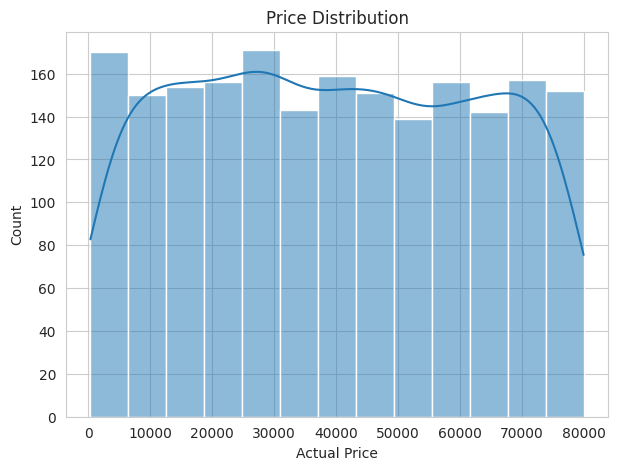

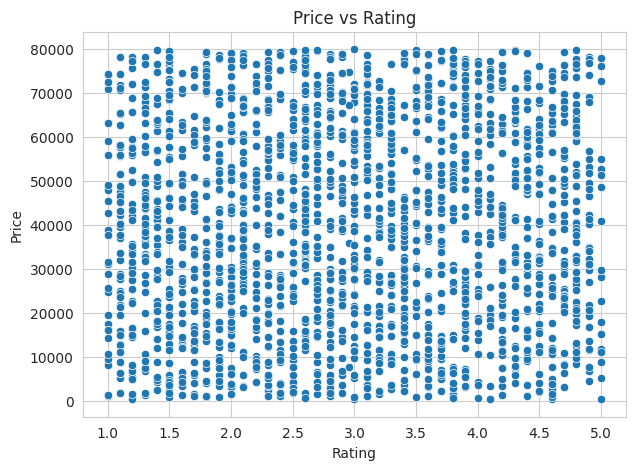

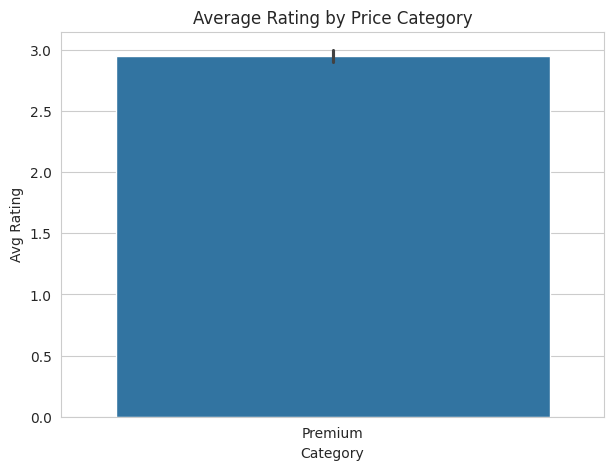

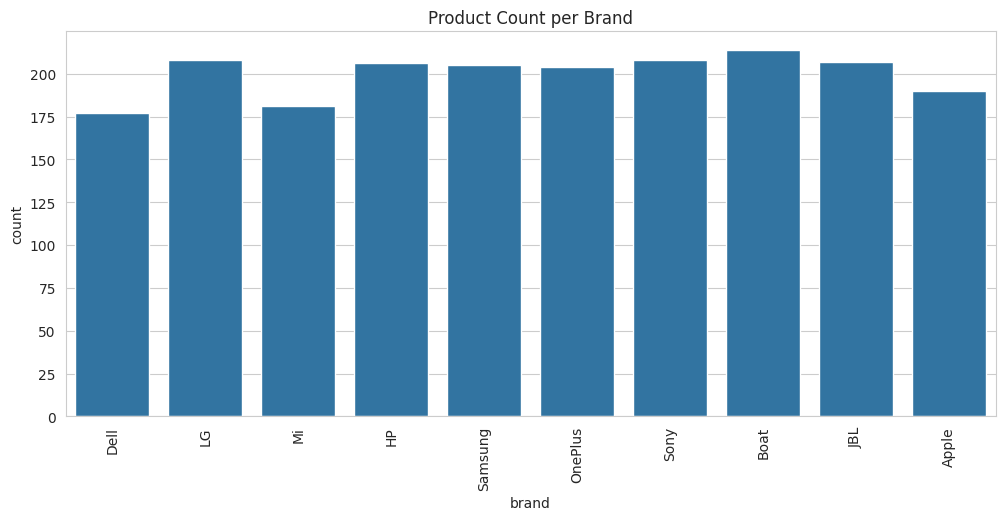

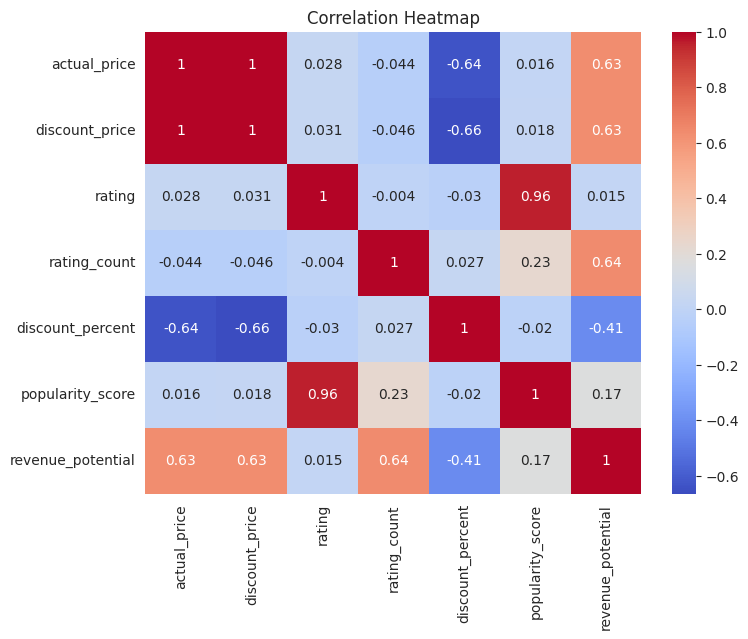

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(7,5))
sns.histplot(df1['actual_price'], kde=True)
plt.title("Price Distribution")
plt.xlabel("Actual Price")
plt.show()
plt.figure(figsize=(7,5))
sns.scatterplot(x=df1['rating'], y=df1['actual_price'])
plt.title("Price vs Rating")
plt.xlabel("Rating")
plt.ylabel("Price")
plt.show()
plt.figure(figsize=(7,5))
sns.barplot(x='price_category', y='rating', data=df1)
plt.title("Average Rating by Price Category")
plt.xlabel("Category")
plt.ylabel("Avg Rating")
plt.show()
plt.figure(figsize=(12,5))
sns.countplot(x='brand', data=df1)
plt.title("Product Count per Brand")
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(8,6))
numeric = df1.select_dtypes(include=['int64','float64'])
sns.heatmap(numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=sns.load_dataset('titanic')
df.head()

#Basic information & overview
print("Shape of dataset:",df.shape)
print("\nData ")


Shape of dataset: (891, 15)

Data 


In [ ]:

#3 missing values analysis
missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/len(df))*100
})
missing.sort_values(by='missing_percent',ascending=False)

,missing_count,missing_percent
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467
sex,0,0.000000
pclass,0,0.000000
survived,0,0.000000
fare,0,0.000000
parch,0,0.000000
sibsp,0,0.000000


In [ ]:
#4. Handling

df['age']=df['age'].fillna(df['age'].mean())
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])
df.drop(columns=['deck'],inplace=True)
print("Missing values after cleaning:",df.isnull().sum())

Missing values after cleaning: survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


In [ ]:

#3 missing values analysis
import pandas as pd

missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/len(df))*100
})
missing.sort_values(by='missing_percent',ascending=False)

,missing_count,missing_percent
embark_town,2,0.224467
survived,0,0.000000
sex,0,0.000000
age,0,0.000000
sibsp,0,0.000000
pclass,0,0.000000
parch,0,0.000000
fare,0,0.000000
class,0,0.000000
embarked,0,0.000000


In [ ]:

#duplicates &datatype check
print("duplicate rows",df.duplicated().sum())
df['class']=df['class'].astype('category')
df['sex']=df['sex'].astype('category')
df['embarked']=df['embarked'].astype('category')
df.info()

duplicate rows 111
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(4), object(3)
memory usage: 67.5+ KB


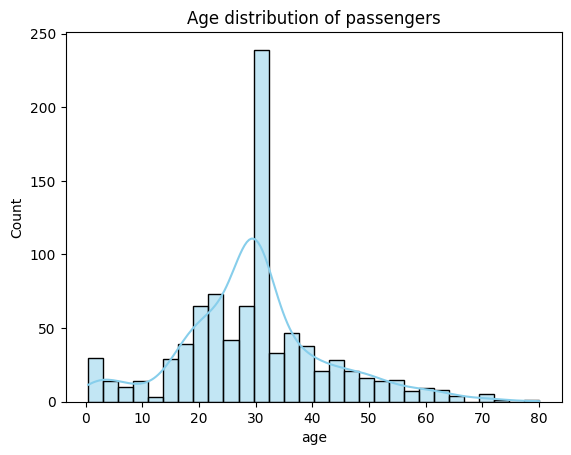

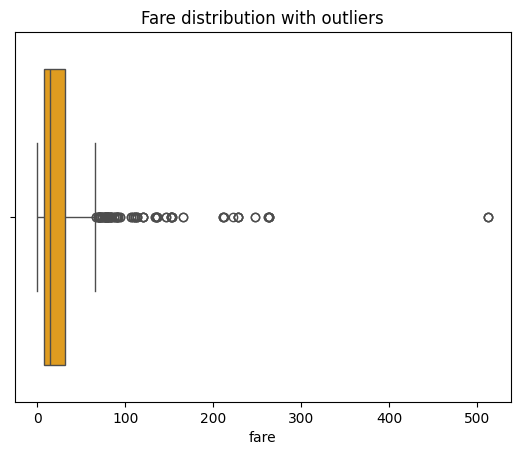

In [ ]:
#6. Univariate analysis- Numerical features
num_cols=df.select_dtypes(include=['float64','int64']).columns
df[num_cols].describe()
sns.histplot(df['age'],bins=30,kde=True,color='skyblue')
plt.title("Age distribution of passengers")
plt.show()

sns.boxplot(x=df['fare'],color='orange')
plt.title("Fare distribution with outliers")
plt.show()

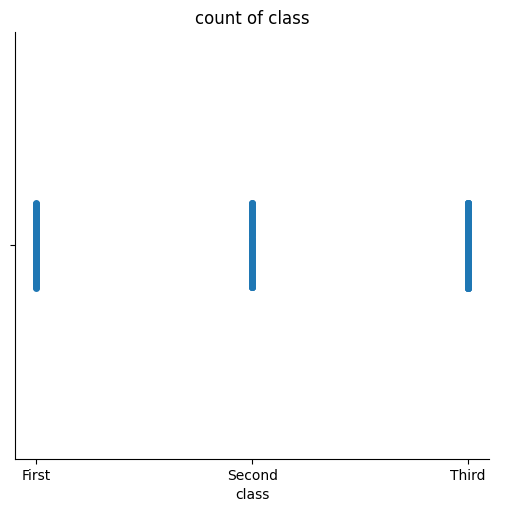

In [ ]:
#univariate analysis-categorical features

cat_cols=df.select_dtypes('category').columns
for col in cat_cols:
  sns.catplot(x=col,data=df)
  plt.title(f"count of {col}")
  plt.show()


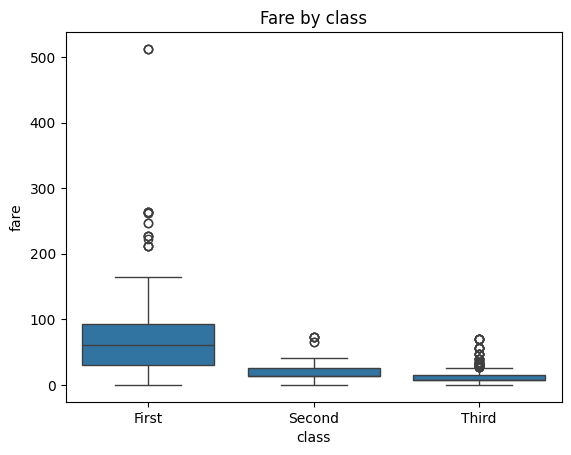

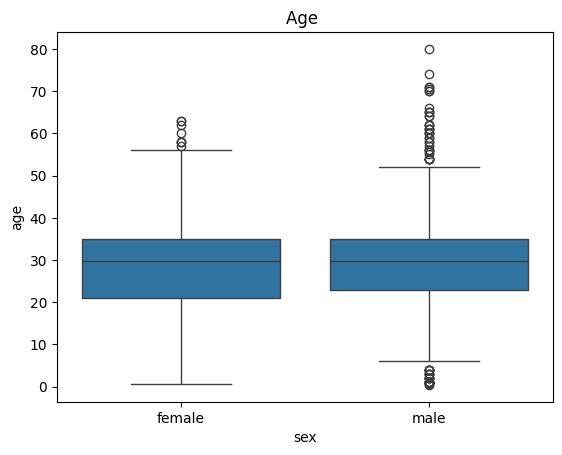

In [ ]:
#bivariate analysis-numerical vs categorical
sns.boxplot(x='class',y='fare',data=df)
plt.title("Fare by class")
plt.show()

sns.boxplot(x='sex',y='age',data=df)
plt.title("Age ")
plt.show()

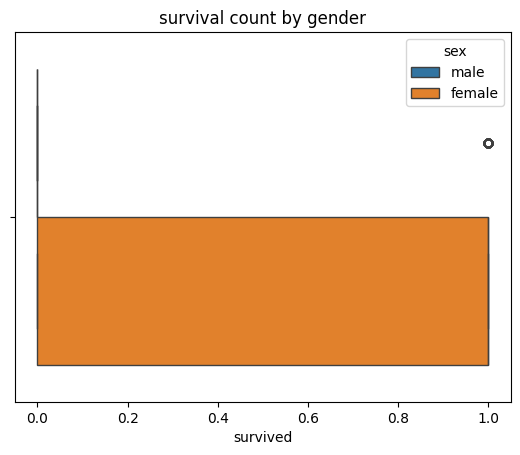

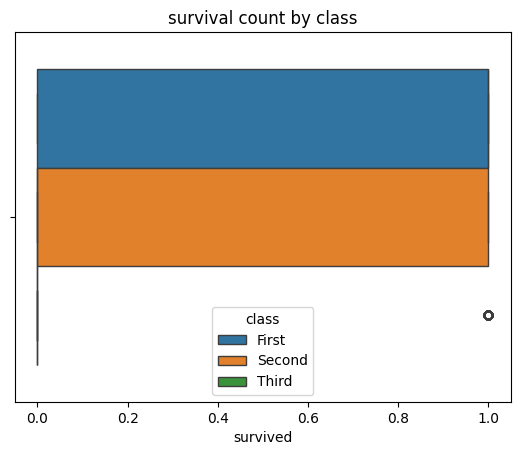

In [ ]:
#bivariate analysis-numerical vs categorical
sns.boxplot(x='survived',hue='sex',data=df)
plt.title("survival count by gender")
plt.show()

sns.boxplot(x='survived',hue='class',data=df)
plt.title("survival count by class")
plt.show()

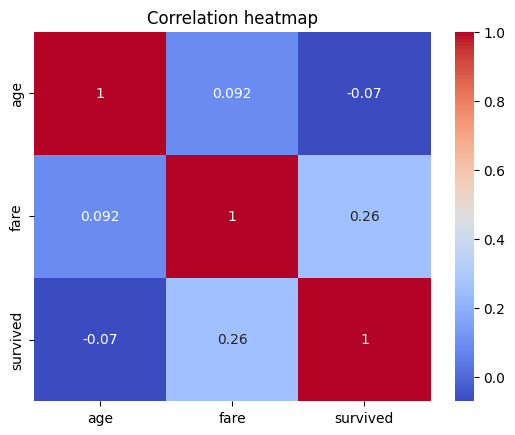

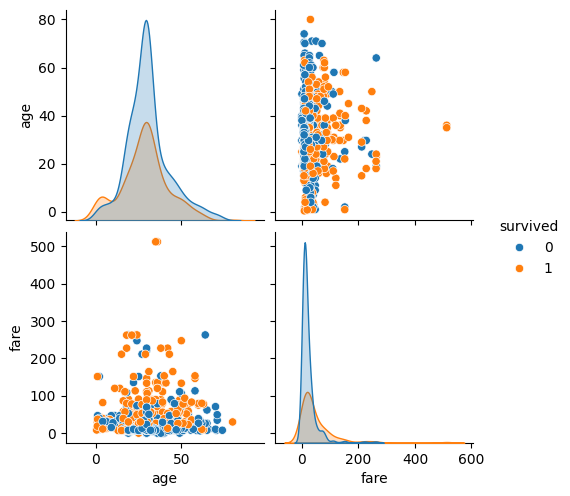

In [ ]:
#correlation and multivariate analysis
corr=df[['age','fare','survived']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Correlation heatmap")
plt.show()
sns.pairplot(df[['age','fare','survived']],hue='survived')
plt.show()

Number of outlier in fare: 116


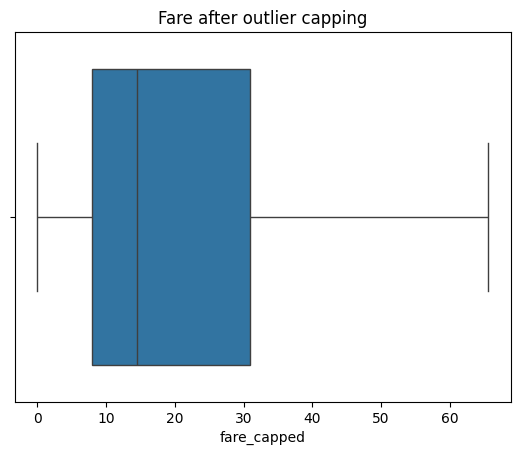

In [ ]:
#Outlier detection using IQR
Q1=df['fare'].quantile(0.25)
Q3=df['fare'].quantile(0.75)
IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
outliers=df[(df['fare']<lower)|(df['fare']>upper)]
print("Number of outlier in fare:",len(outliers))

df['fare_capped']=df['fare'].clip(lower,upper)
sns.boxplot(x=df['fare_capped'])
plt.title("Fare after outlier capping")
plt.show()

Walmart Sales Forecasting Dataset
https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data
Walmart Sales Dataset
You are hired as a Junior Data Analyst at Walmart.

Your job is to analyze sales patterns across stores and departments to help management make data-driven decisions.
You are given multiple datasets (features.csv, sales.csv, stores.csv).

You must merge and analyze them to extract useful insights.
Walmart Recruiting - Store Sales Forecasting
Use historical markdown data to predict store sales

Task 1 — Data Loading, Merging & Initial Inspection
Load all required CSV files into your notebook.
Merge them into one dataset using Store, Dept, and Date.
Display the first and last 10 rows.
Print:
.shape
.info()
.describe()
Identify:
Numerical columns
Categorical columns
Date columns
List all unique store types and departments.
7. Identify which columns may require cleaning or type conversion


 Task 2 — Data Cleaning
Identify missing values using .isnull().sum().
Fill missing numeric values (Temperature, Fuel_Price, CPI, Unemployment) using median.
Fill missing markdown-related fields with mean values.
Convert Date column to datetime format.
Remove duplicate rows.
Reset the index after cleaning.


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

from google.colab import drive

#Mount your Drive
drive.mount('/content/drive')

#once mounted,navigate to the folder
#example path(adjust bsed on your structure)
path='/content/drive/My Drive/Colab Notebooks/features.csv'
path1='/content/drive/My Drive/Colab Notebooks/test.csv'
path2='/content/drive/My Drive/Colab Notebooks/train.csv'
path3='/content/drive/My Drive/Colab Notebooks/stores.csv'



Mounted at /content/drive


In [ ]:
#merging the datasets(features, train,stores,test)
import pandas as pd

features = pd.read_csv(path)
test = pd.read_csv(path1)
train = pd.read_csv(path2)
stores = pd.read_csv(path3)

features['Date'] = pd.to_datetime(features['Date'])
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

merged_train = train.merge(features, on=['Store','Date'], how='left')
merged_train = merged_train.merge(stores, on='Store', how='left')

merged_test = test.merge(features, on=['Store','Date'], how='left')
merged_test = merged_test.merge(stores, on='Store', how='left')

print(merged_train.head(10))
print(merged_train.tail(10))
print(merged_train.shape)
print(merged_train.info())
print(merged_train.describe())

numeric_cols = merged_train.select_dtypes(include=['int64','float64']).columns
categorical_cols = merged_train.select_dtypes(include=['object']).columns
date_cols = merged_train.select_dtypes(include=['datetime']).columns

print(numeric_cols)
print(categorical_cols)
print(date_cols)
print(merged_train['Type'].unique())
print(merged_train['Dept'].unique())

for col in ['Temperature','Fuel_Price','CPI','Unemployment']:
    merged_train[col] = merged_train[col].fillna(merged_train[col].median())
    merged_test[col] = merged_test[col].fillna(merged_test[col].median())

for col in ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']:
    merged_train[col] = merged_train[col].fillna(merged_train[col].mean())
    merged_test[col] = merged_test[col].fillna(merged_test[col].mean())

merged_train['IsHoliday'] = merged_train['IsHoliday_x'] | merged_train['IsHoliday_y']
merged_test['IsHoliday'] = merged_test['IsHoliday_x'] | merged_test['IsHoliday_y']

merged_train.drop(columns=['IsHoliday_x','IsHoliday_y'], inplace=True)
merged_test.drop(columns=['IsHoliday_x','IsHoliday_y'], inplace=True)

merged_train.drop_duplicates(inplace=True)
merged_test.drop_duplicates(inplace=True)

merged_train.reset_index(drop=True, inplace=True)
merged_test.reset_index(drop=True, inplace=True)

print(merged_train.info())
print(merged_train.isnull().sum())
print(merged_train.shape)




   Store  Dept       Date  Weekly_Sales  IsHoliday_x  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50        False        42.31       2.572   
1      1     1 2010-02-12      46039.49         True        38.51       2.548   
2      1     1 2010-02-19      41595.55        False        39.93       2.514   
3      1     1 2010-02-26      19403.54        False        46.63       2.561   
4      1     1 2010-03-05      21827.90        False        46.50       2.625   
5      1     1 2010-03-12      21043.39        False        57.79       2.667   
6      1     1 2010-03-19      22136.64        False        54.58       2.720   
7      1     1 2010-03-26      26229.21        False        51.45       2.732   
8      1     1 2010-04-02      57258.43        False        62.27       2.719   
9      1     1 2010-04-09      42960.91        False        65.86       2.770   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN  

Task 3 — Outlier Detection & Treatment
Detect outliers in:
Weekly_Sales
Temperature
Fuel_Price
CPI
Use:
Boxplots
IQR method
Identify if extreme sales spikes occur during holiday weeks.
Decide which outliers should be:
Removed
Capped
Kept as business outliers

Task 4 — Univariate Analysis
Perform univariate analysis (one variable at a time):
Weekly sales distribution (Histogram + KDE).
Store type distribution (Count plot).
Distribution of Temperature, Fuel Price, CPI, Unemployment.
Distribution of sales during:
Holiday weeks
Non-holiday weeks
Identify top 10 departments by average weekly sales.
✅ Task 5 — Bivariate Analysis
Study the relationship between two variables:
Relationship between Temperature & Weekly Sales (scatter plot).
Relationship between Fuel Price & Weekly Sales.
Weekly Sales vs. Store Type.
Weekly Sales vs. Holiday_Flag.
Compare sales between:
Top-performing store
Lowest-performing store
✅ Task 6 — Multivariate Analysis
Analyze more than two variables together:
Create a correlation heatmap for all numeric features.
Analyze store-level sales using:
Store Type
Store Size
Weekly Sales
Multivariate relationship:
Weekly Sales vs Temperature vs Holiday_Flag (3-variable plot or grouped summary)
Analyze whether discount markdowns influence sales when considering:
Date
Holiday weeks
Markdown values
✅ Task 7 — Time Series Analysis
Convert Date to:
Year
Month
Week
Plot total weekly sales over time.
Plot monthly sales trends for:
Store with highest sales
Store with lowest sales
Identify seasonal patterns:
Which months show peak sales?
Which departments show seasonal demand?
🔥 Task 8 — Feature Engineering
Task 8A — Create New Columns
year, month, week → from date.
discount_effect = MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5
is_peak_season → True if month in {11, 12}.
normalized_sales = Weekly_Sales / Size
Task 8B — Filter Using Created Columns
Show all peak-season transactions where weekly_sales > 50,000.
Show all stores whose normalized_sales is in the top 10% percentile.
Show departments where discount_effect > median discount.
Filter rows where:
Temperature < 40
Fuel price > 3.5
Weekly sales between 20,000 and 60,000
is_peak_season = True
Task 8C — Grouping & Business Insights
Monthly average sales per store.
Total discount_effect per department.
Department with highest normalized_sales.
Compute store-wise revenue potential:
revenue_potential = Weekly_Sales * 52
Identify top 10 stores based on revenue potential.


In [ ]:
'''Task 3 — Outlier Detection & Treatment
Detect outliers in:
Weekly_Sales
Temperature
Fuel_Price
CPI
Use:
Boxplots
IQR method
Identify if extreme sales spikes occur during holiday weeks.
Decide which outliers should be:
Removed
Capped
Kept as business outliers

Task 4 — Univariate Analysis
Perform univariate analysis (one variable at a time):
Weekly sales distribution (Histogram + KDE).
Store type distribution (Count plot).
Distribution of Temperature, Fuel Price, CPI, Unemployment.
Distribution of sales during:
Holiday weeks
Non-holiday weeks
Identify top 10 departments by average weekly sales.

✅ Task 5 — Bivariate Analysis
Study the relationship between two variables:
Relationship between Temperature & Weekly Sales (scatter plot).
Relationship between Fuel Price & Weekly Sales.
Weekly Sales vs. Store Type.
Weekly Sales vs. Holiday_Flag.
Compare sales between:
Top-performing store
Lowest-performing store

✅ Task 6 — Multivariate Analysis
Analyze more than two variables together:
Create a correlation heatmap for all numeric features.
Analyze store-level sales using:
Store Type
Store Size
Weekly Sales
Multivariate relationship:
Weekly Sales vs Temperature vs Holiday_Flag (3-variable plot or grouped summary)
Analyze whether discount markdowns influence sales when considering:
Date
Holiday weeks
Markdown values

✅ Task 7 — Time Series Analysis
Convert Date to:
Year
Month
Week
Plot total weekly sales over time.
Plot monthly sales trends for:
Store with highest sales
Store with lowest sales
Identify seasonal patterns:
Which months show peak sales?
Which departments show seasonal demand?

🔥 Task 8 — Feature Engineering
Task 8A — Create New Columns
year, month, week → from date.
discount_effect = MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5
is_peak_season → True if month in {11, 12}.
normalized_sales = Weekly_Sales / Size

Task 8B — Filter Using Created Columns
Show all peak-season transactions where weekly_sales > 50,000.
Show all stores whose normalized_sales is in the top 10% percentile.
Show departments where discount_effect > median discount.
Filter rows where:
Temperature < 40
Fuel price > 3.5
Weekly sales between 20,000 and 60,000
is_peak_season = True

Task 8C — Grouping & Business Insights
Monthly average sales per store.
Total discount_effect per department.
Department with highest normalized_sales.
Compute store-wise revenue potential:
revenue_potential = Weekly_Sales * 52
Identify top 10 stores based on revenue potential.
 '''

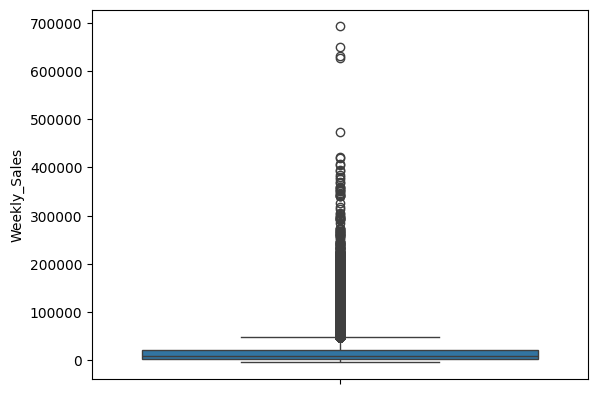

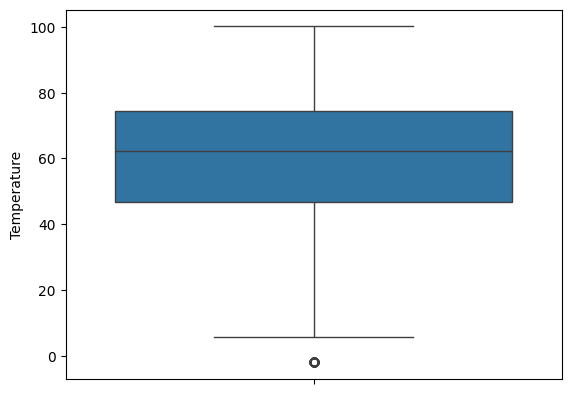

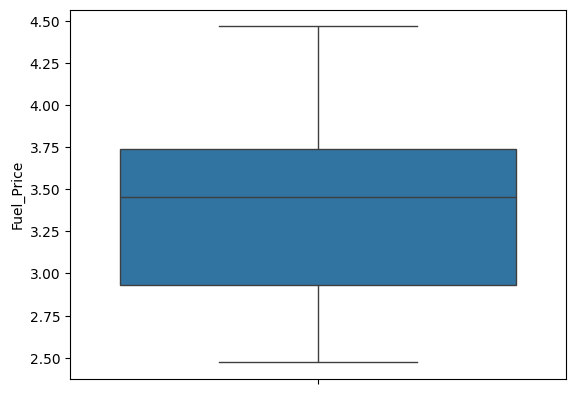

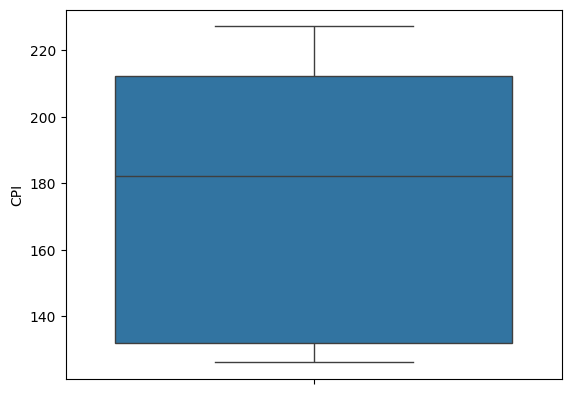

47390.13


In [ ]:
# Task 3 — Outlier Detection & Treatment
df=merged_train
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df['Weekly_Sales'])
plt.show()
sns.boxplot(df['Temperature'])
plt.show()
sns.boxplot(df['Fuel_Price'])
plt.show()
sns.boxplot(df['CPI'])
plt.show()

Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Weekly_Sales'] < (Q1 - 1.5 * IQR)) | (df['Weekly_Sales'] > (Q3 + 1.5 * IQR)))]

holiday_spikes = df[df['IsHoliday'] == True]['Weekly_Sales'].max()
print(holiday_spikes)



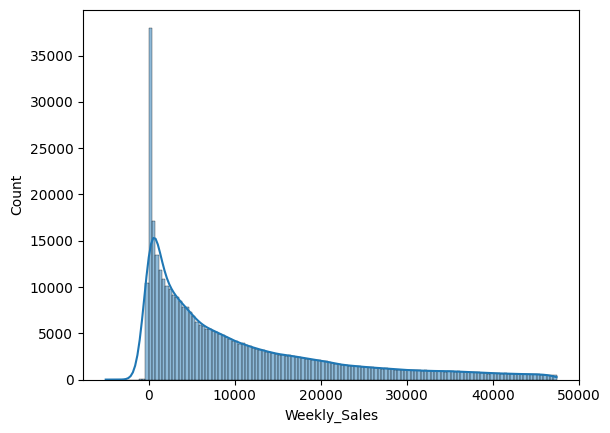

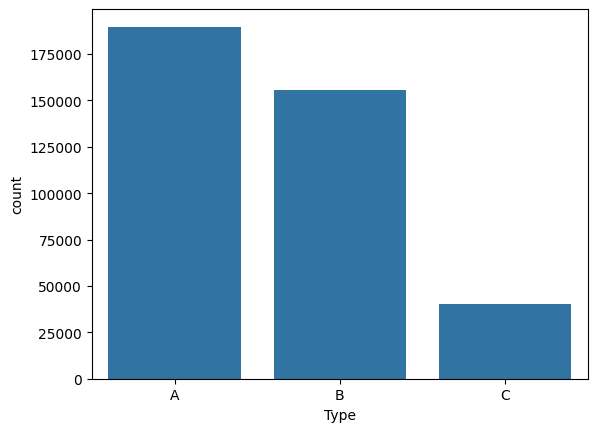

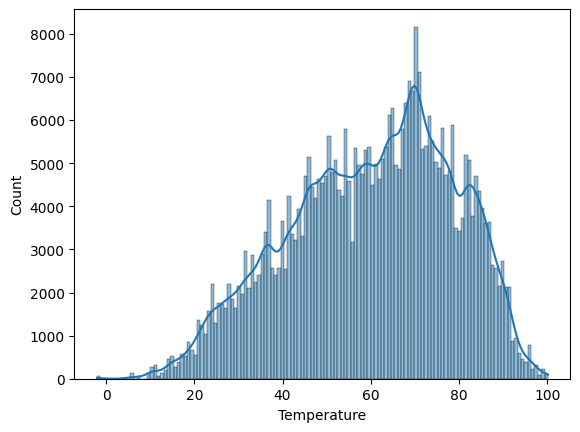

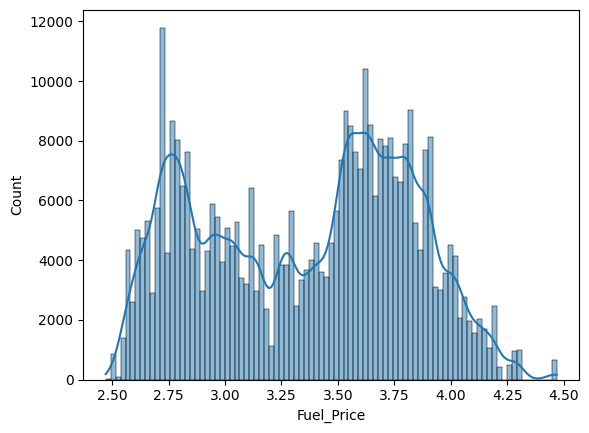

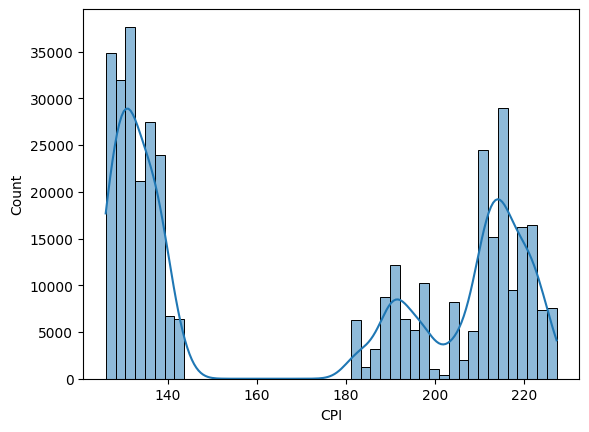

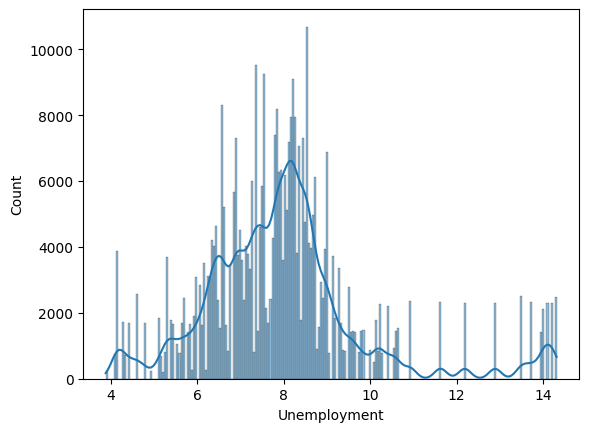

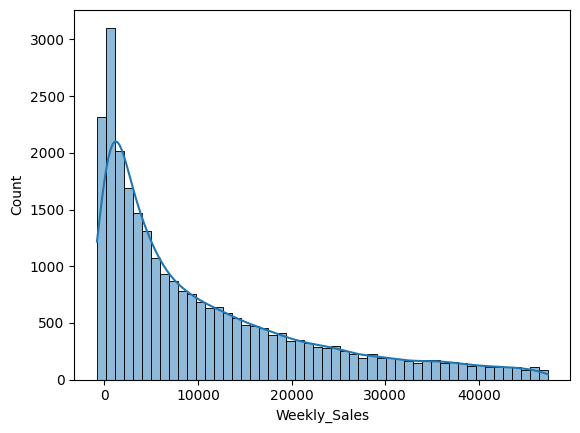

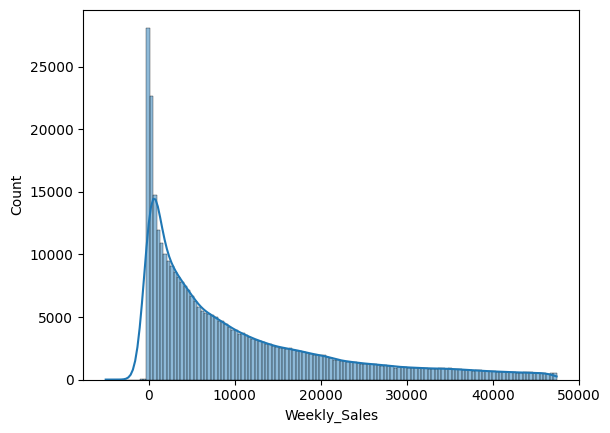

Dept
65    40165.599730
38    36320.555549
95    32636.480465
40    29002.853219
92    27557.714818
2     25649.119090
72    25542.158179
13    25384.300141
8     24684.478052
4     23237.034143
Name: Weekly_Sales, dtype: float64


In [ ]:

# Task 4 — Univariate Analysis
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Weekly_Sales'], kde=True)
plt.show()

sns.countplot(x=df['Type'])
plt.show()

sns.histplot(df['Temperature'], kde=True)
plt.show()
sns.histplot(df['Fuel_Price'], kde=True)
plt.show()
sns.histplot(df['CPI'], kde=True)
plt.show()
sns.histplot(df['Unemployment'], kde=True)
plt.show()

sns.histplot(df[df['IsHoliday'] == True]['Weekly_Sales'], kde=True)
plt.show()
sns.histplot(df[df['IsHoliday'] == False]['Weekly_Sales'], kde=True)
plt.show()

top10_depts = df.groupby('Dept')['Weekly_Sales'].mean().sort_values(ascending=False).head(10)
print(top10_depts)

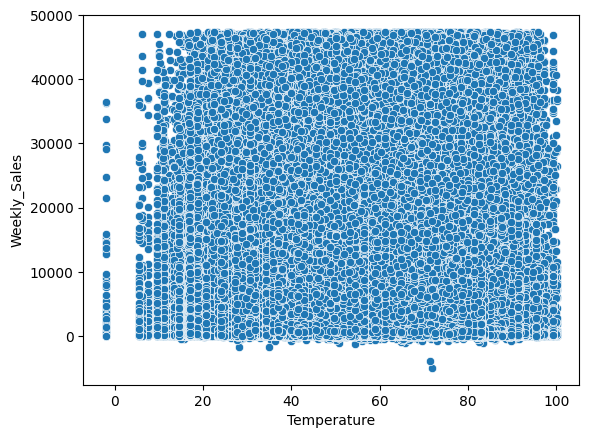

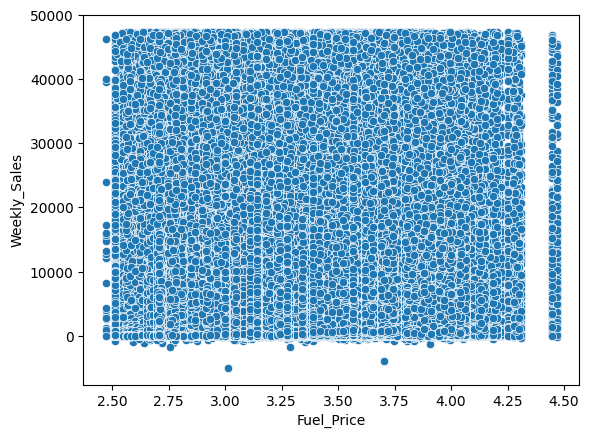

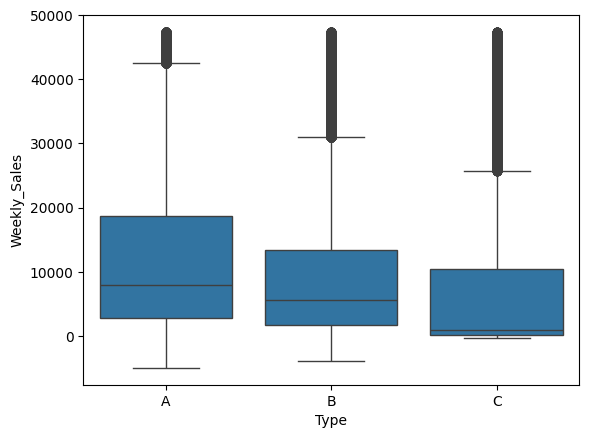

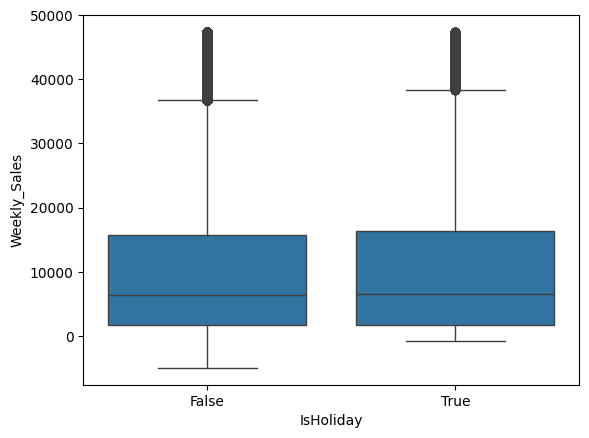

14683.863896189949
5695.504501697007


In [ ]:
# Task 5 — Bivariate Analysis
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df['Temperature'], y=df['Weekly_Sales'])
plt.show()

sns.scatterplot(x=df['Fuel_Price'], y=df['Weekly_Sales'])
plt.show()

sns.boxplot(x=df['Type'], y=df['Weekly_Sales'])
plt.show()

sns.boxplot(x=df['IsHoliday'], y=df['Weekly_Sales'])
plt.show()

store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values()
low = store_sales.index[0]
high = store_sales.index[-1]

print(df[df['Store'] == high]['Weekly_Sales'].mean())
print(df[df['Store'] == low]['Weekly_Sales'].mean())

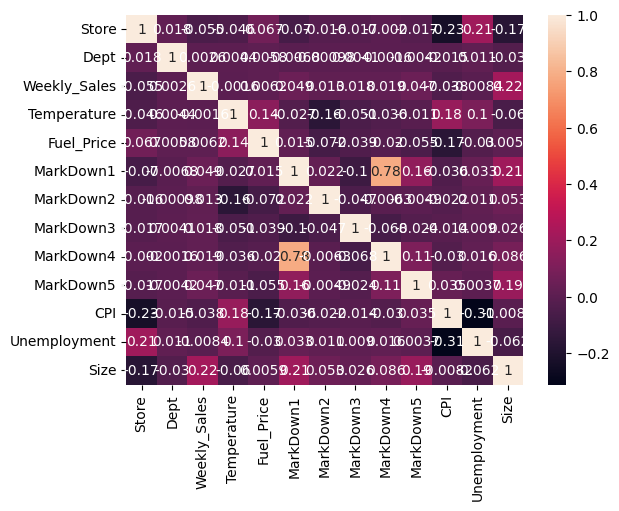

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


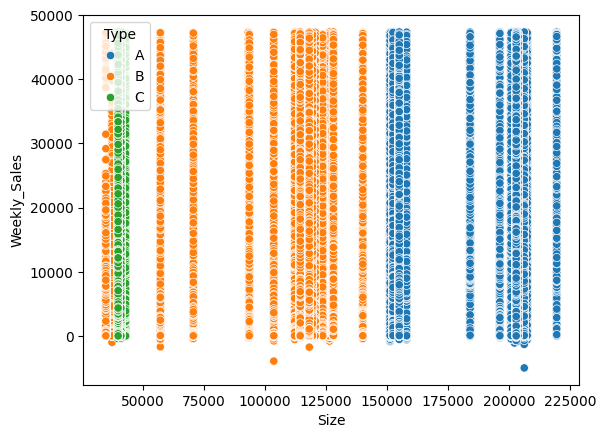

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


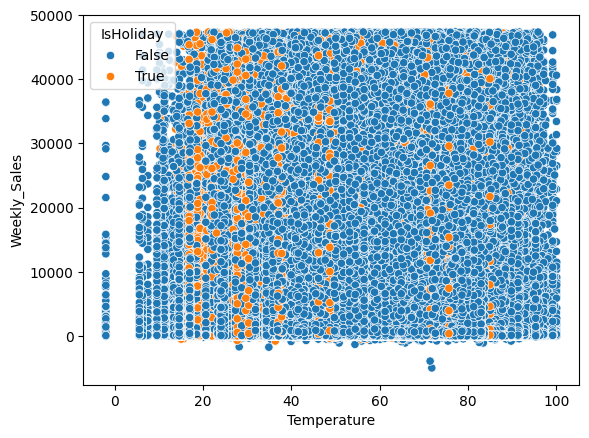

IsHoliday
False    19302.912694
True     27388.376929
Name: Discount_Total, dtype: float64


/tmp/ipython-input-2096841856.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Discount_Total'] = df[markdown_cols].sum(axis=1)


In [ ]:
# Task 6 — Multivariate Analysis
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.select_dtypes(include=['float64','int64']).corr(), annot=True)
plt.show()

sns.scatterplot(x=df['Size'], y=df['Weekly_Sales'], hue=df['Type'])
plt.show()

sns.scatterplot(x=df['Temperature'], y=df['Weekly_Sales'], hue=df['IsHoliday'])
plt.show()

markdown_cols = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
df['Discount_Total'] = df[markdown_cols].sum(axis=1)
print(df.groupby('IsHoliday')['Discount_Total'].mean())

/tmp/ipython-input-2489221371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year
/tmp/ipython-input-2489221371.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.month
/tmp/ipython-input-2489221371.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

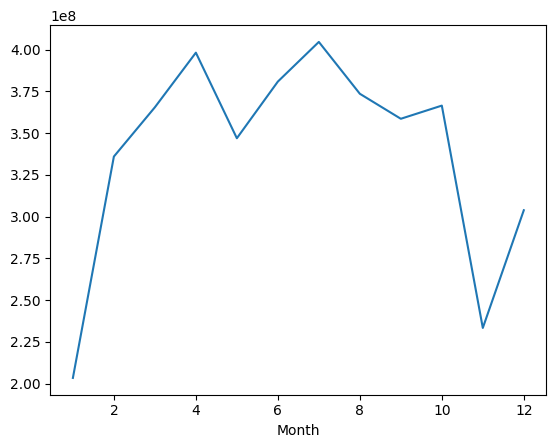

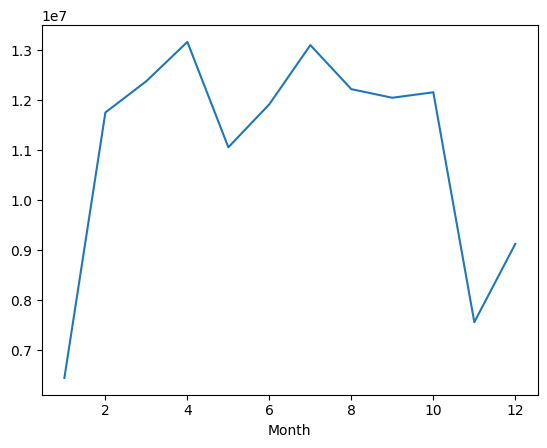

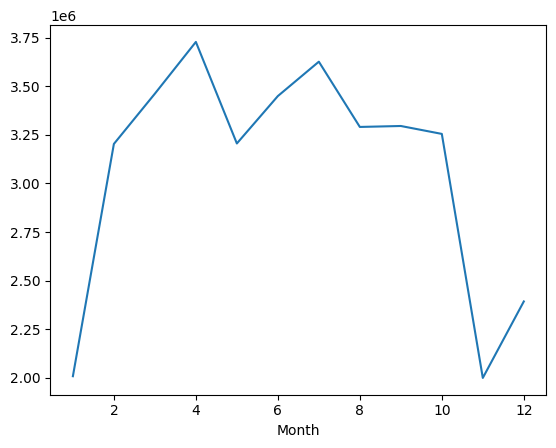

In [ ]:
# Task 7 — Time Series Analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

monthly_sales = df.groupby('Month')['Weekly_Sales'].sum()
monthly_sales.plot(kind='line')
plt.show()

store_sales_sum = df.groupby('Store')['Weekly_Sales'].sum().sort_values()
best = store_sales_sum.index[-1]
worst = store_sales_sum.index[0]

df[df['Store'] == best].groupby('Month')['Weekly_Sales'].sum().plot(kind='line')
plt.show()

df[df['Store'] == worst].groupby('Month')['Weekly_Sales'].sum().plot(kind='line')
plt.show()

In [ ]:
# Task 8
df['discount_effect'] = df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].sum(axis=1)
df['is_peak_season'] = df['Month'].isin([11,12])
df['normalized_sales'] = df['Weekly_Sales'] / df['Size']
peak_sales = df[(df['is_peak_season'] == True) & (df['Weekly_Sales'] > 50000)]
print(peak_sales)

top10_percent = df['normalized_sales'].quantile(0.90)
print(df[df['normalized_sales'] >= top10_percent])

disc_median = df['discount_effect'].median()
print(df[df['discount_effect'] > disc_median])

print(df[(df['Temperature'] < 40) &
        (df['Fuel_Price'] > 3.5) &
        (df['Weekly_Sales'].between(20000, 60000)) &
        (df['is_peak_season'] == True)])
print(df.groupby('Store')['Weekly_Sales'].mean())
print(df.groupby('Dept')['discount_effect'].sum())

best_dept = df.groupby('Dept')['normalized_sales'].mean().idxmax()
print(best_dept)

df['revenue_potential'] = df['Weekly_Sales'] * 52
top10_store_revenue = df.groupby('Store')['revenue_potential'].sum().sort_values(ascending=False).head(10)
print(top10_store_revenue)

Empty DataFrame
Columns: [Store, Dept, Date, Weekly_Sales, Temperature, Fuel_Price, MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5, CPI, Unemployment, Type, Size, IsHoliday, Discount_Total, Year, Month, Week, discount_effect, is_peak_season, normalized_sales]
Index: []

[0 rows x 23 columns]
        Store  Dept       Date  Weekly_Sales  Temperature  Fuel_Price  \
1           1     1 2010-02-12      46039.49        38.51       2.548   
2           1     1 2010-02-19      41595.55        39.93       2.514   
9           1     1 2010-04-09      42960.91        65.86       2.770   
38          1     1 2010-10-29      38640.93        69.64       2.716   
39          1     1 2010-11-05      34238.88        58.74       2.689   
...       ...   ...        ...           ...          ...         ...   
421240     45    95 2011-11-18      46240.97        51.34       3.530   
421242     45    95 2011-12-02      46719.49        50.19       3.452   
421246     45    95 2011-12-30      42084.3

/tmp/ipython-input-3819733349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['discount_effect'] = df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].sum(axis=1)
/tmp/ipython-input-3819733349.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_peak_season'] = df['Month'].isin([11,12])
/tmp/ipython-input-3819733349.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave